In [1]:
import numpy as np
import sys 
import os
import shutil
import matplotlib.pyplot as plt
import scipy.interpolate as sp
import ipyvolume as ipv
sys.path.append('/home/giorgiod/Documents/APDFT/dep')
sys.path.append('/home/giorgiod/Documents/APDFT/src')

In [2]:
from apdft import Calculator

In [3]:
proj_path='/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/'
os.listdir(proj_path)

['def2-QZVPP',
 'LiNa_fixed_scf',
 '631G*',
 'def2-TZVP',
 'sto3G',
 'sto6G',
 '321G',
 'cc-pVTZ',
 'aug-cc-pVQZ',
 'LiNa-def2TZVP-rerun']

In [68]:
basisSets=['sto3G', 'sto6G', '321G','631G*','def2-TZVP','def2-QZVPP','cc-pVTZ','aug-cc-pVQZ']
molecules=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
alchemy=[-2,-1,0,1,2]
Nums={
    "NN":[7,7],
    "CO":[6,8],
    "BF":[5,9],
    "BeNe":[4,10],
    "LiNa":[3,11],
    "HeMg":[2,12],
    "HAl":[1,13]
}
points= np.linspace(1.30,3.20,20)
def dirName(basis_set,molecule,point,alchemy=0):
    return proj_path+basis_set+'/'+molecule+"/A{}_Radius:{}".format(alchemy,str(point)[0:3])+'/'
print (os.path.isdir(dirName(basisSets[3],molecules[2],points[3])))
print (dirName(basisSets[3],molecules[2],points[3]))

True
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/631G*/LiNa/A0_Radius:1.6/


In [5]:
def parse_energy_cc(log_file):
    """Parse the couple cluster energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "Final results:" in line:
                    good_line=logf.readline()
                    if "Total CCSD energy" in good_line:
                        for x in good_line.split(' '):
                            try:
                                float(x)
                                return (float(x))
                            except:
                                pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [6]:
def energy(bs,mol,pt,al=0):
    return parse_energy_cc(dirName(bs,mol,pt,al)+'run.log')

In [7]:
def parse_energy_hf(log_file):
    """Parse the hartree Fock energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "FINAL HARTREE-FOCK ENERGY:" in line:
                    good_line=line
                    for x in good_line.split(' '):
                        try:
                            float(x)
                            return (float(x))
                        except:
                            pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [8]:
def energy_hf(bs,mol,pt,al=0):
    return parse_energy_hf(dirName(bs,mol,pt,al)+'run.log')

In [9]:
energy_hf('sto6G','HAl',2.2)

-241.3704735798517

In [10]:
#for bs in basisSets:
#    for mol in molecules:
#        print (energy(bs,mol,2.1))
    #    print (dirName(bs,mol,2.1))

In [ ]:
"""
# Overview of all molecules all BS at 0th order alchemy (or a given one)
for mol in molecules:
    for bs in basisSets:
        plt.plot(points,[energy(bs,mol,pt,-2) for pt in points],label=bs)
    plt.title(mol)
    plt.legend()
    plt.show()
"""

In [12]:
"""
# CC energies for LiNa
for ao in range(-2,3):
    for bs in basisSets:
        plt.plot(points,[energy(bs,'LiNa',pt,ao) for pt in points],label=bs)
    plt.title('LiNa '+' Alchemy '+ str(ao))
    plt.axvline(1.5)
    plt.axvline(1.8)
    plt.legend()
    plt.show()
    """

"\n# CC energies for LiNa\nfor ao in range(-2,3):\n    for bs in basisSets:\n        plt.plot(points,[energy(bs,'LiNa',pt,ao) for pt in points],label=bs)\n    plt.title('LiNa '+' Alchemy '+ str(ao))\n    plt.axvline(1.5)\n    plt.axvline(1.8)\n    plt.legend()\n    plt.show()\n    "

In [13]:
"""# On LiNa Hartree Fock energies
for ao in range(-2,3):
    for bs in basisSets:
        plt.plot(points,[energy_hf(bs,'LiNa',pt,ao) for pt in points],label=bs)
    plt.title('LiNa '+' Alchemy '+ str(ao))
    plt.axvline(1.5)
    plt.axvline(1.8)
    plt.legend()
    plt.show() """

"# On LiNa Hartree Fock energies\nfor ao in range(-2,3):\n    for bs in basisSets:\n        plt.plot(points,[energy_hf(bs,'LiNa',pt,ao) for pt in points],label=bs)\n    plt.title('LiNa '+' Alchemy '+ str(ao))\n    plt.axvline(1.5)\n    plt.axvline(1.8)\n    plt.legend()\n    plt.show() "

In [14]:
"""ao=2
plt.plot(points,[energy_hf('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')
plt.scatter(1.3,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.3/run.log'))
plt.scatter(1.4,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.4/run.log'))
plt.scatter(1.5,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.5/run.log'))
plt.scatter(1.6,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.6/run.log'))
plt.scatter(1.7,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.7/run.log'))
plt.scatter(1.8,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.8/run.log'))
plt.scatter(1.9,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.9/run.log'))

plt.title('LiNa '+' Alchemy '+str(ao))
plt.axvline(1.5)
plt.axvline(1.8)
plt.legend()
plt.show()"""

"ao=2\nplt.plot(points,[energy_hf('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')\nplt.scatter(1.3,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.3/run.log'))\nplt.scatter(1.4,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.4/run.log'))\nplt.scatter(1.5,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.5/run.log'))\nplt.scatter(1.6,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.6/run.log'))\nplt.scatter(1.7,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.7/run.log'))\nplt.scatter(1.8,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.8/run.log'))\nplt.scatter(1.9,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.9/run.log'))\n\nplt.title('LiNa '+' Alchemy '+str(ao))\nplt.axvline(1.5)\nplt.axvline(1.8)\nplt.legend()\nplt.show()"

In [15]:
"""ao=1
plt.plot(points,[energy('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')
#plt.scatter(1.3,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.3/run.log'))
plt.scatter(1.4,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.4/run.log'))
plt.scatter(1.5,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.5/run.log'))
plt.scatter(1.6,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.6/run.log'))
plt.scatter(1.7,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.7/run.log'))
plt.scatter(1.8,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.8/run.log'))
#plt.scatter(1.9,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.9/run.log'))

plt.title('LiNa '+' Alchemy '+str(ao))
plt.axvline(1.4)
plt.axvline(1.8)
plt.legend()
plt.show()"""

"ao=1\nplt.plot(points,[energy('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')\n#plt.scatter(1.3,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.3/run.log'))\nplt.scatter(1.4,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.4/run.log'))\nplt.scatter(1.5,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.5/run.log'))\nplt.scatter(1.6,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.6/run.log'))\nplt.scatter(1.7,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.7/run.log'))\nplt.scatter(1.8,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.8/run.log'))\n#plt.scatter(1.9,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.9/run.log'))\n\nplt.title('LiNa '+' Alchemy '+str(ao))\nplt.axvline(1.4)\nplt.axvline(1.8)\nplt.legend()\nplt.show()"

In [16]:
"""for bs in basisSets: 
    apes=[]
    for mol in molecules:
        apes.append(energy('cc-pVTZ',mol,2.))
    plt.plot(apes,label=bs)
plt.legend()"""

"for bs in basisSets: \n    apes=[]\n    for mol in molecules:\n        apes.append(energy('cc-pVTZ',mol,2.))\n    plt.plot(apes,label=bs)\nplt.legend()"

# get minimun and vibrational frequency

In [17]:
nn_scan=np.asarray([energy('def2-TZVP','NN',pt) for pt in points])
NN_spline_pes=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
NN_spline=sp.spline(points,nn_scan,NN_spline_pes, order=3)
m=NN_spline.argmin()
k=(NN_spline[m+1]+NN_spline[m-1]-2*NN_spline[m])/(1.9e-3)**2
Rmin=1.3+m*1.9e-3

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
mu_nn=12766.4683422
lightspeed=137.035999753
planck=6.28318530718
centimeter=188972613.392
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

In [19]:
to_cm(k,mu_nn),Rmin

(2435.177842315386, 2.0695)

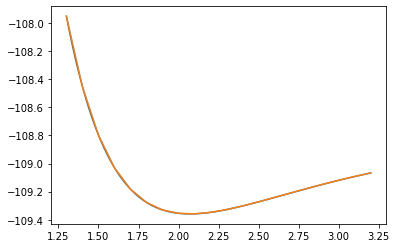

In [20]:
plt.plot(NN_spline_pes,NN_spline)
plt.plot(points,nn_scan)

In [21]:
def sppes(bs,mol,ao=0):
    points=np.linspace(1.3,3.2,20)
    scan=np.asarray([energy(bs,mol,pt) for pt in points])
    target_pts=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
    return sp.spline(points,nn_scan,target_pts, order=3)

In [118]:
def get_grid(basis_set,molecule,point,alchemy=0):
    return (Calculator.MrccCalculator.get_grid(None, None, dirName(basis_set,molecule,point,alchemy=0)))
def get_ccdensity(basis_set,molecule,point,alchemy=0):
    return Calculator.MrccCalculator.density_on_grid(dirName(basis_set,molecule,point,alchemy)+'DENSITY',get_grid(basis_set,molecule,point,alchemy)[0])

In [23]:
(get_grid('sto3G','BeNe',2.0)[1]-get_grid('aug-cc-pVQZ','BeNe',2.0)[1])[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [24]:
def deltaV(ref,targ,r,bs='sto3G'):
    """Function for diatomics, from a couple of molecules reference target with identical geometry returns the 
    DV on the grid of the reference molecule, also the basis set needs to be specified 
    note the use of Nums to get the atomic numbers"""
    coordinates=np.asarray([[0,0,0],[r,0,0]])
    deltaCharge=np.asarray(Nums[targ])-np.asarray(Nums[ref])
    grid=get_grid(bs,ref,r)
    ds=[]
    ds.append(np.linalg.norm((grid[0] - coordinates[0]),axis=1))
    ds.append(np.linalg.norm((grid[0] - coordinates[1]),axis=1))
                #  grid, coordinates in angstrom * 1.88 -> bohr (au) for Hamiltonian calcs.
    deltaV = np.zeros(len(grid[1]))
    for atomidx in range(2):
        deltaV += (-deltaCharge[atomidx])/ ds[atomidx] # the minus is due to the charge of the electron=-1
    return (deltaV)

$\tilde{\rho} = \rho^0 +\frac{1}{2}\rho' +\frac{1}{6}\rho " + \frac{1}{24}\rho ^{(3)}+ \frac{1}{120}\rho ^{(4)} $ 

## 5point coefficients <br>
0  :      0    :  1    :  0   :     0  <br>
1/12 :	−2/3 :	0 	 : 2/3 :	−1/12    for first deriv <br>
−1/12 :	4/3 :	−5/2 : 4/3 : −1/12  for second deriv <br>
−1/2 :	 1 	:    0 	:  −1    :  1/2   for third deriv <br>
 1  :	−4  :	6 	:  −4   : 1       for fourth deriv <br>

In [25]:
# Finite difference coefficients 
dh=0.05  # 
coeff0=np.asarray([0,0,1,0,0])
coeff1=np.asarray([1/12,-2/3,0,2/3,-1/12])
#coeff1=np.asarray([0,-1/2,0,1/2,0])
coeff2=np.asarray([-1/12 , 4/3 , -5/2 , 4/3 , -1/12])
coeff3=np.asarray([-1/2 , 1 , 0 , -1 , 1/2])
coeff4=np.asarray([1 ,-4 , 6 ,-4 , 1])
coeffs=[coeff0,coeff1,coeff2,coeff3,coeff4]
coeff_tilda=np.asarray([coeff0,1/2*coeff1,1/6*coeff2/dh**2,1/24*coeff3/dh**3,1/120*coeff4/dh**4])
print (coeff_tilda, np.sum(coeff_tilda))
ao=2
rt=np.zeros(5)
for x in range(ao+1):
    rt+=coeff_tilda[x]
print (rt)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 4.16666667e-02 -3.33333333e-01  0.00000000e+00  3.33333333e-01
  -4.16666667e-02]
 [-5.55555556e+00  8.88888889e+01 -1.66666667e+02  8.88888889e+01
  -5.55555556e+00]
 [-1.66666667e+02  3.33333333e+02  0.00000000e+00 -3.33333333e+02
   1.66666667e+02]
 [ 1.33333333e+03 -5.33333333e+03  8.00000000e+03 -5.33333333e+03
   1.33333333e+03]] 1.0000000000009095
[  -5.51388889   88.55555556 -165.66666667   89.22222222   -5.59722222]


In [139]:
def rho_tilda(mol,bs,r,ao):
    """returns rho tilda on the reference mol grid for given (mol,bs,r,ao) """
    rho_tilda=np.zeros(len(get_grid(bs,mol,r)[1]))
    rtc=np.zeros(5)
    for x in range(ao+1):
        rtc+=coeff_tilda[x]
#    print ('RTC =' , rtc)
    for x in range(5):
        rho_tilda+=get_ccdensity(bs,mol,r,x-2)*rtc[x]   ### note error in defining alchemy order 
    return rho_tilda

In [142]:
def rho_deriv(mol,bs,r,deriv):
    dh=0.05
    rho_deriv=np.zeros(len(get_grid(bs,mol,r)[1]))
    for x in range(5):
        rho_deriv+=get_ccdensity(bs,mol,r,x-2)*coeffs[deriv][x]
    return rho_deriv/dh**deriv

In [143]:
rho_deriv('CO','sto6G',1.8,3)-rho_deriv('CO','sto6G',1.8,0)

array([-6.13854076e-24, -6.13878561e-24, -6.13733503e-24, ...,
       -7.03468320e-30, -4.39497166e-30,  0.00000000e+00])

In [29]:
def alchem_predict2(ref,targ,r,bs,ao):
    Pred_energy=energy(bs,ref,r,0)  # energy of reference
    print (str(Pred_energy)+'   ___ reference energy')
    #adding the Nuclear nuclear interaction (only diatomics)
    Pred_energy+=(Nums[targ][0]*Nums[targ][1]-Nums[ref][0]*Nums[ref][1])/r
    print (str(Pred_energy)+'   ___ added Nuc-Nuc')
    
    Pred_energy-=np.sum(deltaV(ref,targ,r)*rho_tilda(ref,bs,r,ao)*get_grid(bs,ref,r)[1]) # Integral of dV * Rho tilda * grid Weghts 
    
    print (str(Pred_energy)+' __return value')

In [88]:
#@functools.lru_cache
def alchem_predict(ref,targ,r,bs,ao):
    """Returns the energy predicted by alchemy for a given pair of reference and target molecules
    The atom distance, the basis set and the alchemical order needs to be specified """
    Pred_energy=energy(bs,ref,r,0)  # energy of reference
    #print (str(Pred_energy)+'   ___ reference energy')
    #adding the Nuclear nuclear interaction (only diatomics)
    Pred_energy+=(Nums[targ][0]*Nums[targ][1]-Nums[ref][0]*Nums[ref][1])/r
    #print (str(Pred_energy)+'   ___ added Nuc-Nuc')
    Pred_energy+=np.sum(deltaV(ref,targ,r)*rho_deriv(ref,bs,r,0)*get_grid(bs,ref,r)[1])
    #print (str(Pred_energy)+'   ___ 0th order ')
    if ao==0: return Pred_energy
    Pred_energy+=np.sum(deltaV(ref,targ,r)*rho_deriv(ref,bs,r,1)*get_grid(bs,ref,r)[1])/2*(Nums[targ][0]-Nums[ref][0])**1
    #print (str(Pred_energy)+'   ___ 1st order ')
    if ao==1: return Pred_energy
    Pred_energy+=np.sum(deltaV(ref,targ,r)*rho_deriv(ref,bs,r,2)*get_grid(bs,ref,r)[1])/6*(Nums[targ][0]-Nums[ref][0])**2
    #print (str(Pred_energy)+'   ___ 2nd order ')
    if ao==2: return Pred_energy
    Pred_energy+=np.sum(deltaV(ref,targ,r)*rho_deriv(ref,bs,r,3)*get_grid(bs,ref,r)[1])/24*(Nums[targ][0]-Nums[ref][0])**3
    #print (str(Pred_energy)+'   ___ 3rd order ')
    if ao==3: return Pred_energy
    Pred_energy+=np.sum(deltaV(ref,targ,r)*rho_deriv(ref,bs,r,4)*get_grid(bs,ref,r)[1])/120*(Nums[targ][0]-Nums[ref][0])**4
    #print (str(Pred_energy)+'   ___ 4th order ')
    
   
    return (Pred_energy)

In [93]:
#alchem_predict2('BF','NN',2.0,'aug-cc-pVQZ',2)
%time alchem_predict('CO','NN',2.0,'aug-cc-pVQZ',0)

CPU times: user 34.5 ms, sys: 17.1 ms, total: 51.6 ms
Wall time: 50.8 ms


-106.11150135245407

In [63]:
energy('aug-cc-pVQZ','CO',2.0)

-113.159782548132

In [33]:
rho_tilda('CO','321G',2.0,0)-rho_tilda('CO','321G',2.0,1)

array([1.62705876e-32, 1.52717154e-32, 1.36369928e-32, ...,
       2.68291941e-41, 1.47103805e-41, 1.02691888e-41])

# Tabular Data Format 
We want $E^{CCSD}, E_A \ and \  | \Delta E| $ <br> 
for every  1)basis  set [8],   2)Geometry [20],   3)Ref [7],  4)Target [6]  5) Alchemy order 0-4 [5]  <br>
8*20*7*6 *5 = 33600  Data Points

In [151]:
8*20*7*6 *5

33600

In [42]:
import pandas as pd
import pickle

In [69]:
#the choices are among the following lists
print (basisSets)
print (molecules)
print (points)

['sto3G', 'sto6G', '321G', '631G*', 'def2-TZVP', 'def2-QZVPP', 'cc-pVTZ', 'aug-cc-pVQZ']
['HAl', 'HeMg', 'LiNa', 'BeNe', 'BF', 'CO', 'NN']
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.
 3.1 3.2]


In [83]:
## eg-predicting 
energy(basisSets[7],molecules[3],points[8]),alchem_predict(molecules[5],molecules[3],points[8],basisSets[7],4)

-113.171215583245   ___ reference energy
-116.98073939276881   ___ added Nuc-Nuc
-130.20683184563316   ___ 0th order 
-143.34917561531518   ___ 1st order 
-143.28433595344538   ___ 2nd order 
-143.0537067673999   ___ 3rd order 
-143.05734900793394   ___ 4th order 


(-143.249341172668, -143.05734900793394)

In [107]:
def tab_line(bs,d,ref,targ,ao):
    line={'Basis Set':bs,'Atoms distance':d,'Reference mol.':ref,'Target mol.':targ,'Alchemy exp.order':ao}
    line.update({'E.ccsd':energy(bs,targ,d)})
    line.update({'E.alch': alchem_predict(ref,targ,d,bs,ao)})
    line.update ({'abs.err.':abs(line['E.ccsd']-line['E.alch'])})
    return line

In [120]:
%time print(tab_line('aug-cc-pVQZ',2.0,'BF','CO',4))

{'Basis Set': 'aug-cc-pVQZ', 'Atoms distance': 2.0, 'Reference mol.': 'BF', 'Target mol.': 'CO', 'Alchemy exp.order': 4, 'E.ccsd': -113.159782548132, 'E.alch': -113.12750367573994, 'abs.err.': 0.03227887239205529}
CPU times: user 119 ms, sys: 69.4 ms, total: 189 ms
Wall time: 198 ms


In [114]:
molecules[2] != molecules[1]

True

In [144]:
tab_sto3g=[]
#for bs in basisSets:
bs='sto3G'
for ref in molecules:
    print (ref)
    for targ in molecules:
        if ref != targ:
            for d in points:
                for ao in range(5):
                    tab_sto3g.append(tab_line(bs,d,ref,targ,ao))

HAl
HeMg
LiNa
BeNe
BF
CO
NN


In [149]:
df_sto3G=pd.DataFrame(tab_sto3g)
df_sto3G.to_pickle('./sto3G_data')

In [169]:
x='buffalo'    
exec("%s = %d" % (x,2))
buffalo
basisSets

['sto3G',
 'sto6G',
 '321G',
 '631G*',
 'def2-TZVP',
 'def2-QZVPP',
 'cc-pVTZ',
 'aug-cc-pVQZ']

In [170]:
bs='631G*'
tab=[]
for ref in molecules:
    print (bs+'-'+ref)
    for targ in molecules:
        if ref != targ:
            for d in points:
                for ao in range(5):
                    tab.append(tab_line(bs,d,ref,targ,ao))
df_631G=pd.DataFrame(tab)
df_631G.to_pickle('./631G_data')

bs='def2-QZVPP'
tab=[]
for ref in molecules:
    print (bs+'-'+ref)
    for targ in molecules:
        if ref != targ:
            for d in points:
                for ao in range(5):
                    tab.append(tab_line(bs,d,ref,targ,ao))
df_def2_QZVPP=pd.DataFrame(tab)
df_def2_QZVPP.to_pickle('./def2-QZVPP_data')

bs='cc-pVTZ'
tab=[]
for ref in molecules:
    print (bs+'-'+ref)
    for targ in molecules:
        if ref != targ:
            for d in points:
                for ao in range(5):
                    tab.append(tab_line(bs,d,ref,targ,ao))
df_cc_pVTZ=pd.DataFrame(tab)
df_cc_pVTZ.to_pickle('./cc-pVTZ_data')


bs='aug-cc-pVQZ'
tab=[]
for ref in molecules:
    print (bs+'-'+ref)
    for targ in molecules:
        if ref != targ:
            for d in points:
                for ao in range(5):
                    tab.append(tab_line(bs,d,ref,targ,ao))
df_aug_cc_pVQZ=pd.DataFrame(tab)
df_aug_cc_pVQZ.to_pickle('./aug-cc-pVQZ_data')

631G*-HAl
631G*-HeMg
631G*-LiNa
631G*-BeNe
631G*-BF
631G*-CO
631G*-NN
def2-QZVPP-HAl
def2-QZVPP-HeMg
def2-QZVPP-LiNa
def2-QZVPP-BeNe
def2-QZVPP-BF
def2-QZVPP-CO
def2-QZVPP-NN
cc-pVTZ-HAl
cc-pVTZ-HeMg
cc-pVTZ-LiNa
cc-pVTZ-BeNe
cc-pVTZ-BF
cc-pVTZ-CO
cc-pVTZ-NN
aug-cc-pVQZ-HAl
aug-cc-pVQZ-HeMg
aug-cc-pVQZ-LiNa
aug-cc-pVQZ-BeNe
aug-cc-pVQZ-BF
aug-cc-pVQZ-CO
aug-cc-pVQZ-NN


In [172]:
bs='def2-TZVP'
tab=[]
for ref in molecules:
    for targ in molecules:
        if ref != targ:
            for d in points:
                print (bs,ref,targ,d)
                for ao in range(5):
                    tab.append(tab_line(bs,d,ref,targ,ao))
df_def2_TZVP=pd.DataFrame(tab)
df_def2_TZVP.to_pickle('./def2_TZVP_data')

def2-TZVP HAl HeMg 1.3
def2-TZVP HAl HeMg 1.4000000000000001
def2-TZVP HAl HeMg 1.5
def2-TZVP HAl HeMg 1.6
def2-TZVP HAl HeMg 1.7000000000000002
def2-TZVP HAl HeMg 1.8
def2-TZVP HAl HeMg 1.9000000000000001
def2-TZVP HAl HeMg 2.0
def2-TZVP HAl HeMg 2.1
def2-TZVP HAl HeMg 2.2
def2-TZVP HAl HeMg 2.3
def2-TZVP HAl HeMg 2.4000000000000004
def2-TZVP HAl HeMg 2.5
def2-TZVP HAl HeMg 2.6
def2-TZVP HAl HeMg 2.7
def2-TZVP HAl HeMg 2.8
def2-TZVP HAl HeMg 2.9000000000000004
def2-TZVP HAl HeMg 3.0
def2-TZVP HAl HeMg 3.1
def2-TZVP HAl HeMg 3.2
def2-TZVP HAl LiNa 1.3
def2-TZVP HAl LiNa 1.4000000000000001
def2-TZVP HAl LiNa 1.5
def2-TZVP HAl LiNa 1.6
def2-TZVP HAl LiNa 1.7000000000000002
def2-TZVP HAl LiNa 1.8
def2-TZVP HAl LiNa 1.9000000000000001
def2-TZVP HAl LiNa 2.0
def2-TZVP HAl LiNa 2.1
def2-TZVP HAl LiNa 2.2
def2-TZVP HAl LiNa 2.3
def2-TZVP HAl LiNa 2.4000000000000004
def2-TZVP HAl LiNa 2.5
def2-TZVP HAl LiNa 2.6
def2-TZVP HAl LiNa 2.7
def2-TZVP HAl LiNa 2.8
def2-TZVP HAl LiNa 2.9000000000000004

def2-TZVP LiNa BF 2.3
def2-TZVP LiNa BF 2.4000000000000004
def2-TZVP LiNa BF 2.5
def2-TZVP LiNa BF 2.6
def2-TZVP LiNa BF 2.7
def2-TZVP LiNa BF 2.8
def2-TZVP LiNa BF 2.9000000000000004
def2-TZVP LiNa BF 3.0
def2-TZVP LiNa BF 3.1
def2-TZVP LiNa BF 3.2
def2-TZVP LiNa CO 1.3
def2-TZVP LiNa CO 1.4000000000000001
def2-TZVP LiNa CO 1.5
def2-TZVP LiNa CO 1.6
def2-TZVP LiNa CO 1.7000000000000002
def2-TZVP LiNa CO 1.8
def2-TZVP LiNa CO 1.9000000000000001
def2-TZVP LiNa CO 2.0
def2-TZVP LiNa CO 2.1
def2-TZVP LiNa CO 2.2
def2-TZVP LiNa CO 2.3
def2-TZVP LiNa CO 2.4000000000000004
def2-TZVP LiNa CO 2.5
def2-TZVP LiNa CO 2.6
def2-TZVP LiNa CO 2.7
def2-TZVP LiNa CO 2.8
def2-TZVP LiNa CO 2.9000000000000004
def2-TZVP LiNa CO 3.0
def2-TZVP LiNa CO 3.1
def2-TZVP LiNa CO 3.2
def2-TZVP LiNa NN 1.3
def2-TZVP LiNa NN 1.4000000000000001
def2-TZVP LiNa NN 1.5
def2-TZVP LiNa NN 1.6
def2-TZVP LiNa NN 1.7000000000000002
def2-TZVP LiNa NN 1.8
def2-TZVP LiNa NN 1.9000000000000001
def2-TZVP LiNa NN 2.0
def2-TZVP LiNa

def2-TZVP CO HeMg 2.1
def2-TZVP CO HeMg 2.2
def2-TZVP CO HeMg 2.3
def2-TZVP CO HeMg 2.4000000000000004
def2-TZVP CO HeMg 2.5
def2-TZVP CO HeMg 2.6
def2-TZVP CO HeMg 2.7
def2-TZVP CO HeMg 2.8
def2-TZVP CO HeMg 2.9000000000000004
def2-TZVP CO HeMg 3.0
def2-TZVP CO HeMg 3.1
def2-TZVP CO HeMg 3.2
def2-TZVP CO LiNa 1.3
def2-TZVP CO LiNa 1.4000000000000001
def2-TZVP CO LiNa 1.5
def2-TZVP CO LiNa 1.6
def2-TZVP CO LiNa 1.7000000000000002
def2-TZVP CO LiNa 1.8
def2-TZVP CO LiNa 1.9000000000000001
def2-TZVP CO LiNa 2.0
def2-TZVP CO LiNa 2.1
def2-TZVP CO LiNa 2.2
def2-TZVP CO LiNa 2.3
def2-TZVP CO LiNa 2.4000000000000004
def2-TZVP CO LiNa 2.5
def2-TZVP CO LiNa 2.6
def2-TZVP CO LiNa 2.7
def2-TZVP CO LiNa 2.8
def2-TZVP CO LiNa 2.9000000000000004
def2-TZVP CO LiNa 3.0
def2-TZVP CO LiNa 3.1
def2-TZVP CO LiNa 3.2
def2-TZVP CO BeNe 1.3
def2-TZVP CO BeNe 1.4000000000000001
def2-TZVP CO BeNe 1.5
def2-TZVP CO BeNe 1.6
def2-TZVP CO BeNe 1.7000000000000002
def2-TZVP CO BeNe 1.8
def2-TZVP CO BeNe 1.900000000

In [178]:
print (dir())

['Calculator', 'In', 'NN_spline', 'NN_spline_pes', 'Nums', 'Out', 'Rmin', '_', '_11', '_113', '_114', '_12', '_123', '_124', '_126', '_127', '_13', '_130', '_134', '_14', '_141', '_143', '_148', '_15', '_150', '_151', '_152', '_156', '_16', '_164', '_166', '_169', '_173', '_174', '_175', '_176', '_19', '_20', '_23', '_28', '_3', '_31', '_32', '_33', '_35', '_36', '_37', '_38', '_39', '_40', '_41', '_43', '_44', '_49', '_60', '_61', '_62', '_63', '_64', '_65', '_66', '_67', '_70', '_71', '_72', '_73', '_74', '_75', '_76', '_77', '_78', '_79', '_80', '_81', '_82', '_83', '_84', '_85', '_86', '_87', '_89', '_9', '_90', '_91', '_92', '_93', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105', '_i106', '_i107', '_i108', '_i109', '_i11', '_i110', '_i111', '_i112', '_i113', '_i114', '_i115', '_i116', '_i117', '_i118', '_i119', '_i12', '_i120', '_i121', '_i12

In [180]:
dfs=['df_sto3G','df_sto6G','df_321G','df_631G','df_def2_TZVP', 'df_def2_QZVPP','df_cc_pVTZ', 'df_aug_cc_pVQZ']
%store dfs

Stored 'dfs' (list)


In [182]:
len(dfs)

8